# 머신러닝 시작

### 퍼셉트론 구현하기 - 함수기반

아이리스 데이터 셋

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_wine

In [65]:
iris_dataset = load_iris()

In [66]:
# scikit-learn이 제공하는 데이터셋의 구조 확인(다른 데이터셋도 거의 동일/유사한 구조)
print( type(iris_dataset) ) # iris_dataset은 dict와 유사한 구조의 데이터
print( iris_dataset.keys() ) # dict와 유사한 구조라서 keys를 가져올 수 있다
# print( iris_dataset['DESCR'] )
print( iris_dataset['data'][:3, :] )        # feature(x)에 해당하는 데이터(2차원 넘파이 어레이)
print( iris_dataset['target'][:3] )         # target(y)에 해당하는 데이터(1차원)
print( np.unique(iris_dataset['target']) )  # target(y)에 해당하는 데이터(1차원)
print( iris_dataset['target_names'] )       # target(y)의 실제 값
# 'data' = x, 'target' = y, 'target_names' = 숫자가 의미하는 이름을 정의
# 'DESCR', 'feature_names', 'filename', 'data_module'

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[0 0 0]
[0 1 2]
['setosa' 'versicolor' 'virginica']


프랑크 로젠블라트의 논리(퍼셉트론 알고리즘) : Net input 함수 만들기

In [67]:
# pass : 지금은 아니지만 나중에 코드를 넣을 거라는 의미
def net_input(X, w):    # X: 1D array, w: 1D array 1차원 배열
    # return sum([x*w for x, w in zip(X, w[1:])]) + w[0]
    return np.dot(X, w[1:]) + w[0]
    # (np.dot하면 알아서 Transpose해 줌) W1X1 + W2X2 + ... + WnXn + W0*1 이 연산 함

In [68]:
net_input([1, 2, 3, 4, 5], [10, 20, 30, 40, 50, 60])

np.int64(710)

프랑크 로젠블라트의 논리(퍼셉트론 알고리즘) : Activation 구현

In [ ]:
def activation(v):
    # if v > 0:
    #     return 1
    # else
    #     return -1
    return 1 if v > 0 else -1 # 0보다 크면 1 아니면 -1
# 위의 if문과 완벽하게 같다

In [86]:
activation(0.7), activation(-0.2)

(1, -1)

퍼셉트론 알고리즘 - net input과 activation 함수 이어 붙이기

In [87]:
def predict(X, w):
    net_value = net_input(X, w)
    activated_value = activation(net_value)
    return activated_value

In [204]:
def fit(X, y, eta, n_iter):
    """
    데이터를 사용해서 perceptron 모델을 훈련하는 함수\n\n
    [전달인자]
    1. X : feature
    2. y : target
    3. eta : 학습률(learning rate)
    4. n_iter : 학습 반복 횟수
    """
    w = np.zeros(X.shape[1] + 1) # X.shape : 2차원 배열의 열 갯수, +1은 편향(bias)에 대한 것
    # 리스트를 직접 쓰는 것보다 np를 쓰는게 좋다
    errors = np.zeros(n_iter)
    # 학습 반복 횟수 크기의 오차 배열 만들기 (오차 로그용)

    for idx in np.arange(n_iter): # 학습 반복
        # _는 필요 없다는 뜻. 
        sum_of_error = 0
        for xv, t in zip(X, y): # 한 행의 입력 + 타겟을 뽑아서 아래 문장(학습)을 실행 * 행 갯수
            # zip : 양쪽에서 하나씩 뽑아서 묶어주는 것, X, y에서 뽑아서 xv, t에 넣어주는 것
            output = predict(xv, w) # net input + activation -> 1 or -1 반환
            error = t - output      # 오차 계산 (실제값 - 출력값)
            # sum_of_error += error   # 현재 학습 반복의 에러를 합산
            sum_of_error += 1 if error != 0 else 0
            # 오차가 0이 아니라면(오차가 없는게 아니라면) 1을 증가시킨다는 의미
            delta = eta * error     # 가중치 업데이트에 적용할 값 계산 (델타가중치 = 학습률(t-o)x)
            w[1:] += delta * xv     # 가중치 업데이트 
            w[0] = delta * 1        # 가중치(편향) 업데이트. 처음것은 1*w0라서 xv(입력값)이 없다. 

        errors[idx] = sum_of_error  # 에러 로그(히스트리)에 현재 학습 반복의 에러 추가
        # 한 에포크당 에러가 어떻게 되는지

    return w, errors                # 업데이트된 최종 가중치와 에러를 반환

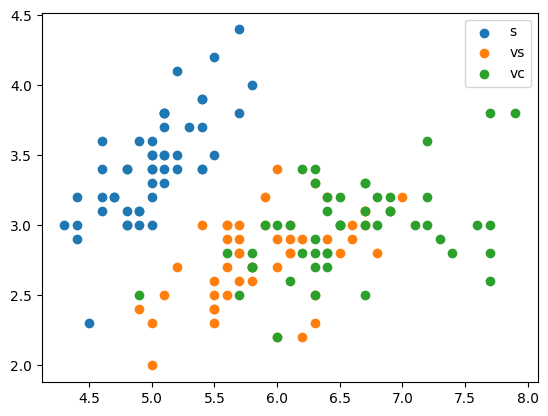

In [205]:
# 구분이 잘 되는 품종 찾기
X = iris_dataset['data']
plt.scatter(X[:50, 0], X[:50, 1], label = 's')
plt.scatter(X[50:100, 0], X[50:100, 1], label = 'vs')
plt.scatter(X[100:150, 0], X[100:150, 1], label = 'vc')
plt.legend()
plt.show()

In [206]:
X = iris_dataset['data'][:100] # 100까지만
y = iris_dataset['target'][:100] # 0 : 50개, 1 : 50개
# y = list( map(lambda v: -1 if v == 0 else 1, y) ) # 0 -> -1, 1 -> 1로 변경
y = np.where(y == 0, -1, 1) # y의 각 값이 0이면 -1, 아니면 1로 변경 위의 if와 같은 의미
eta, n_iter = 0.1, 10   # 학습률, 반복 횟수

result_w, result_errors = fit(X, y, eta, n_iter)

In [207]:
result_w, result_errors
# 0, 1, 2 epoch까지 돌리고, 3번 epoch 부터는 에려율 0

(array([ 0.  , -0.22, -0.72,  1.04,  0.44]),
 array([1., 3., 1., 0., 0., 0., 0., 0., 0., 0.]))

In [208]:
sum_of_error = 0
for xv, t in zip(X, y):
    predicted_value = predict(xv, result_w) # 학습된 가중치를 사용해서 값 예측
    sum_of_error += (predicted_value != t)  # 예측이 틀리면 error 1 증가
    # print(predicted_value, t)
print("Accuracy : {0}".format(1 - (sum_of_error / 100))) # 정확도(에러/데이터갯수) 출력

Accuracy : 1.0


In [209]:
X = iris_dataset['data'][50:] # 100까지만
y = iris_dataset['target'][50:] # 0 : 50개, 1 : 50개
# y = list( map(lambda v: -1 if v == 1 else 1, y) ) # 0 -> -1, 1 -> 1로 변경
y = np.where(y == 1, -1, 1) # y의 각 값이 0이면 -1, 아니면 1로 변경 위의 if와 같은 의미 (모델과 출력 값이 같도록 ??)
eta, n_iter = 0.1, 10   # 학습률, 반복 횟수

result_w, result_errors = fit(X, y, eta, n_iter)

sum_of_error = 0
for xv, t in zip(X, y):
    predicted_value = predict(xv, result_w) # 학습된 가중치를 사용해서 값 예측
    sum_of_error += (predicted_value != t)  # 예측이 틀리면 error 1 증가
    # print(predicted_value, t)
print("Accuracy : {0}".format(1 - (sum_of_error / 100))) # 정확도(에러/데이터갯수) 출력

Accuracy : 0.5


연습(과제) - 와인(2진 분류)

In [210]:
wine_dataset = load_wine()

In [211]:
wine_dataset.keys()
# wine_dataset['target'], wine_dataset['target_names']
# 'data', 'target', 'target_names'
# 'target_names'있다면 보통 다중 분류일 가능성이 높다
# print( wine_dataset['DESCR'] )

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [212]:
wine_dataset

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [213]:
# wine_dataset을 사용해서 class_0과 나머지를 구분하는 이진 퍼셉트론 모델 사용
# (위에서 만든 모델 사용)

In [214]:
wine_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [215]:
# class_0 (59), class_1 (71), class_2 (48)
print( "class_0의 비율: ", 59/(59+71+48))
print( "class_1의 비율: ", 71/(59+71+48))
print( "class_2의 비율: ", 48/(59+71+48))

class_0의 비율:  0.33146067415730335
class_1의 비율:  0.398876404494382
class_2의 비율:  0.2696629213483146


class0과 나머지 구하기

Accuracy : 0.6685393258426966


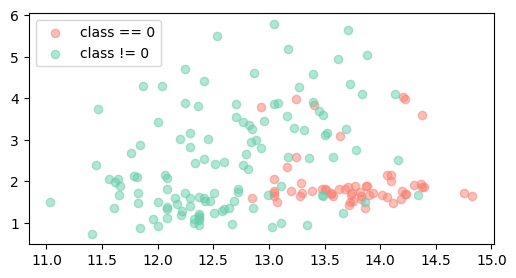

In [216]:
X = wine_dataset['data']
y = wine_dataset['target']
y = np.where(y == 0, -1, 1) 
eta, n_iter = 0.05, 50   # 학습률, 반복 횟수

result_w, result_errors = fit(X, y, eta, n_iter)

sum_of_error = 0
for xv, t in zip(X, y):
    predicted_value = predict(xv, result_w) # 학습된 가중치를 사용해서 값 예측
    sum_of_error += (predicted_value != t)  # 예측이 틀리면 error 1 증가
    # print(predicted_value, t)
print("Accuracy : {0}".format(1 - (sum_of_error / X.shape[0]))) # 정확도(에러/데이터갯수) 출력

mask = y == -1
plt.figure(figsize=(6,3))
plt.scatter(X[y == -1, 0], X[y == -1, 1], label = 'class == 0', c='salmon', alpha = 0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label = 'class != 0', c='mediumaquamarine', alpha = 0.5)
plt.legend()
plt.show()

class_1과 나머지 구하기

Accuracy : 0.601123595505618


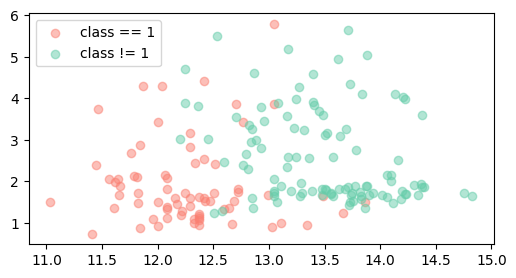

In [217]:
X = wine_dataset['data']
y = wine_dataset['target']
y = np.where(y == 1, -1, 1) 
eta, n_iter = 0.05, 50   # 학습률, 반복 횟수

result_w, result_errors = fit(X, y, eta, n_iter)

sum_of_error = 0
for xv, t in zip(X, y):
    predicted_value = predict(xv, result_w) # 학습된 가중치를 사용해서 값 예측
    sum_of_error += (predicted_value != t)  # 예측이 틀리면 error 1 증가
    # print(predicted_value, t)
print("Accuracy : {0}".format(1 - (sum_of_error / X.shape[0]))) # 정확도(에러/데이터갯수) 출력

mask = y == -1
plt.figure(figsize=(6,3))
plt.scatter(X[y == -1, 0], X[y == -1, 1], label = 'class == 1', c='salmon', alpha = 0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label = 'class != 1', c='mediumaquamarine', alpha = 0.5)
plt.legend()
plt.show()

class_2와 나머지 구하기

Accuracy : 0.7303370786516854


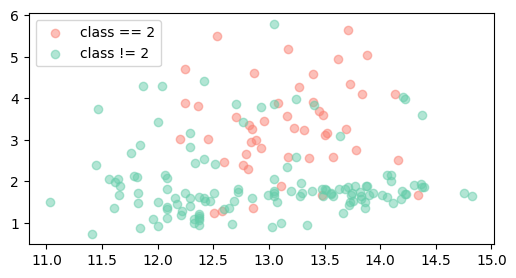

In [218]:
X = wine_dataset['data']
y = wine_dataset['target']
y = np.where(y == 2, -1, 1) 
eta, n_iter = 0.1, 50   # 학습률, 반복 횟수

result_w, result_errors = fit(X, y, eta, n_iter)

sum_of_error = 0
for xv, t in zip(X, y):
    predicted_value = predict(xv, result_w) # 학습된 가중치를 사용해서 값 예측
    sum_of_error += (predicted_value != t)  # 예측이 틀리면 error 1 증가
    # print(predicted_value, t)
print("Accuracy : {0}".format((sum_of_error / X.shape[0]))) # 정확도(에러/데이터갯수) 출력

mask = y == -1
plt.figure(figsize=(6,3))
plt.scatter(X[y == -1, 0], X[y == -1, 1], label = 'class == 2', c='salmon', alpha = 0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], label = 'class != 2', c='mediumaquamarine', alpha = 0.5)
plt.legend()
plt.show()

# 선생님과 함께

In [219]:
wine_dataset = load_wine()
wine_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [223]:
X = wine_dataset['data']
y = wine_dataset['target']
y2 = np.where(y == 0, 1, -1) # 기존 데이터 중 0 -> 1, 나머지(1, 2) -> -1 

In [224]:
y2

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [227]:
rw, re = fit(X, y2, eta=0.1, n_iter=30)
# rw: 학습된 결과물 
# re: 에러 히스토리
rw, re

(array([   0.    ,  -48.016 ,   -0.762 ,   -4.51  ,  -47.68  , -251.2   ,
          -4.73  ,    9.722 ,   -2.972 ,    9.042 ,    6.488 ,   -5.9912,
           4.554 ,  -32.    ]),
 array([3., 3., 3., 3., 2., 3., 3., 3., 3., 2., 3., 3., 3., 3., 2., 3., 3.,
        3., 3., 2., 3., 3., 3., 3., 2., 3., 3., 3., 3., 2.]))

In [228]:
error_cnt = 0
for xv, t in zip(X, y2):
    pv = predict(xv, rw)
    error_cnt += (pv != t)

print( "Accuracy : {0}".format( error_cnt / len(y2)) )

Accuracy : 0.33146067415730335


In [ ]:
X.max(axis=0)
# 스케일이 중구난방 > 데이터가 편향되어 나온다.

array([1.483e+01, 5.800e+00, 3.230e+00, 3.000e+01, 1.620e+02, 3.880e+00,
       5.080e+00, 6.600e-01, 3.580e+00, 1.300e+01, 1.710e+00, 4.000e+00,
       1.680e+03])

In [267]:
from sklearn.preprocessing import MinMaxScaler

In [268]:
# X를 최소-최대 정규화해서 모든 컬럼의 값을 0~1로 바꿈 > 스케일 맞추기
X2 = MinMaxScaler().fit_transform(X)

In [269]:
rw, re = fit(X2, y2, eta=0.1, n_iter=100)

In [270]:
re

array([4., 2., 4., 5., 3., 2., 3., 5., 5., 3., 5., 5., 5., 5., 4., 5., 5.,
       6., 4., 3., 5., 5., 5., 4., 3., 5., 6., 4., 3., 5., 5., 5., 4., 3.,
       5., 5., 4., 3., 5., 5., 4., 3., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 4., 3., 5., 5., 5., 5., 4., 3., 3., 4., 3.,
       5., 4., 3., 5., 5., 4., 3., 5., 5., 5., 5., 5., 3., 5., 5., 4., 3.,
       2., 3., 5., 5., 5., 5., 5., 2., 3., 2., 3., 2., 3., 5., 4.])

In [271]:
error_cnt = 0
for xv, t in zip(X2, y2):
    pv = predict(xv, rw)
    error_cnt += (pv != t)

print( "Accuracy : {0}".format( 1 - (error_cnt / len(y2))) )

Accuracy : 0.9775280898876404
